## Multiple Liner Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Fetching data**

In [3]:
df = pd.read_csv('../data/housing.csv')

**Analys data**

In [4]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(              price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
           parking  
 count  545.000000  
 mean     0.693578  
 std      0.861586  
 min      0.000000  
 25%      0.000000  
 50%      0.000000  
 75%      1.000000  
 max      3.000000  ,
 None)

In [5]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [6]:
for column in binary_columns:
    df[column] = df[column].map({'yes':1, 'no':0})

In [7]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True, dtype=int)

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [8]:
df.isna().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [12]:
X = df[['price']].to_numpy()
y = df['price'].to_numpy()
X

array([[13300000],
       [12250000],
       [12250000],
       [12215000],
       [11410000],
       [10850000],
       [10150000],
       [10150000],
       [ 9870000],
       [ 9800000],
       [ 9800000],
       [ 9681000],
       [ 9310000],
       [ 9240000],
       [ 9240000],
       [ 9100000],
       [ 9100000],
       [ 8960000],
       [ 8890000],
       [ 8855000],
       [ 8750000],
       [ 8680000],
       [ 8645000],
       [ 8645000],
       [ 8575000],
       [ 8540000],
       [ 8463000],
       [ 8400000],
       [ 8400000],
       [ 8400000],
       [ 8400000],
       [ 8400000],
       [ 8295000],
       [ 8190000],
       [ 8120000],
       [ 8080940],
       [ 8043000],
       [ 7980000],
       [ 7962500],
       [ 7910000],
       [ 7875000],
       [ 7840000],
       [ 7700000],
       [ 7700000],
       [ 7560000],
       [ 7560000],
       [ 7525000],
       [ 7490000],
       [ 7455000],
       [ 7420000],
       [ 7420000],
       [ 7420000],
       [ 735

## Standart Devitation

$$
\sigma = \sqrt{\frac{1}{n} \sum(x_i - \bar{x})^2}
$$

In [13]:
std = np.sqrt(1/len(X) * np.sum((X - np.average(X))**2))
std

np.float64(1868722.8281312082)

## Standart Scaling

$$
x_{scaled} = \frac{x - \bar{x}}{\sigma}
$$

In [14]:
x_scaled = (X - np.average(X)) / std
x_scaled

array([[ 4.56636513e+00],
       [ 4.00448405e+00],
       [ 4.00448405e+00],
       [ 3.98575468e+00],
       [ 3.55497918e+00],
       [ 3.25530927e+00],
       [ 2.88072189e+00],
       [ 2.88072189e+00],
       [ 2.73088693e+00],
       [ 2.69342819e+00],
       [ 2.69342819e+00],
       [ 2.62974834e+00],
       [ 2.43121702e+00],
       [ 2.39375829e+00],
       [ 2.39375829e+00],
       [ 2.31884081e+00],
       [ 2.31884081e+00],
       [ 2.24392333e+00],
       [ 2.20646459e+00],
       [ 2.18773522e+00],
       [ 2.13154711e+00],
       [ 2.09408838e+00],
       [ 2.07535901e+00],
       [ 2.07535901e+00],
       [ 2.03790027e+00],
       [ 2.01917090e+00],
       [ 1.97796629e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.88806531e+00],
       [ 1.83187721e+00],
       [ 1.79441847e+00],
       [ 1.77351649e+00],
       [ 1.75321385e+00],
       [ 1.71950099e+00],
       [ 1.7

## Standart Scaling via SKLearn

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled2 = scaler.fit_transform(X)
x_scaled2

array([[ 4.56636513e+00],
       [ 4.00448405e+00],
       [ 4.00448405e+00],
       [ 3.98575468e+00],
       [ 3.55497918e+00],
       [ 3.25530927e+00],
       [ 2.88072189e+00],
       [ 2.88072189e+00],
       [ 2.73088693e+00],
       [ 2.69342819e+00],
       [ 2.69342819e+00],
       [ 2.62974834e+00],
       [ 2.43121702e+00],
       [ 2.39375829e+00],
       [ 2.39375829e+00],
       [ 2.31884081e+00],
       [ 2.31884081e+00],
       [ 2.24392333e+00],
       [ 2.20646459e+00],
       [ 2.18773522e+00],
       [ 2.13154711e+00],
       [ 2.09408838e+00],
       [ 2.07535901e+00],
       [ 2.07535901e+00],
       [ 2.03790027e+00],
       [ 2.01917090e+00],
       [ 1.97796629e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.94425342e+00],
       [ 1.88806531e+00],
       [ 1.83187721e+00],
       [ 1.79441847e+00],
       [ 1.77351649e+00],
       [ 1.75321385e+00],
       [ 1.71950099e+00],
       [ 1.7

## Split data manually for train and test

In [9]:
cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

X = df[cols].values
y = df['price'].values

indices = np.arange(len(X))
np.random.seed(42)
np.random.shuffle(indices)
indices
X_shuffled = X[indices]
y_shuffled = y[indices]
y_shuffled

array([ 4060000,  6650000,  3710000,  6440000,  2800000,  4900000,
        5250000,  4543000,  2450000,  3353000, 10150000,  2660000,
        3360000,  3360000,  2275000,  2660000,  2660000,  7350000,
        2940000,  2870000,  6720000,  5425000,  1890000,  5250000,
        4193000, 12250000,  3080000,  5110000,  9800000,  2520000,
        6790000,  3500000,  6650000,  2940000,  3325000,  4200000,
        4900000,  3290000,  3500000,  2380000,  5495000,  3675000,
        6650000,  4907000,  3150000,  4480000,  6580000,  5740000,
        3003000,  1820000,  8400000,  2450000,  4270000,  4007500,
        3234000,  1750000,  9800000,  2100000,  4340000,  3045000,
        3850000,  3500000,  4753000,  3080000,  4550000,  6510000,
        6685000,  5110000,  4550000,  6650000,  3640000,  5600000,
        3780000,  6615000,  3220000,  6650000,  4690000,  4830000,
        6860000,  2233000,  7035000,  4165000,  6195000,  6510000,
        1890000,  8190000,  2660000,  4193000, 13300000,  9681

In [10]:
train_size = int(0.8 * len(X_shuffled))
X_train = X_shuffled[:train_size]
y_train = y_shuffled[:train_size]
X_test = X_shuffled[train_size:]
y_test = y_shuffled[train_size:]

X_train.shape, y_train.shape

((436, 13), (436,))

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
y_pred = model.predict(X_test)

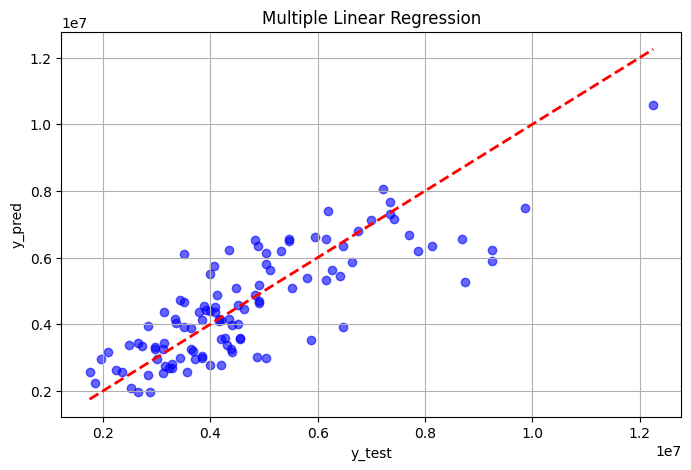

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Multiple Linear Regression")
plt.grid(True)
plt.show()